<a href="https://colab.research.google.com/github/Fakhryrama/Data_Mining/blob/main/TimeSeries_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Simulate sine wave data
np.random.seed(0)
timesteps = np.linspace(0, 100, 500)
data = np.sin(timesteps) + 0.1 * np.random.randn(500)

# Normalize
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1)).flatten()

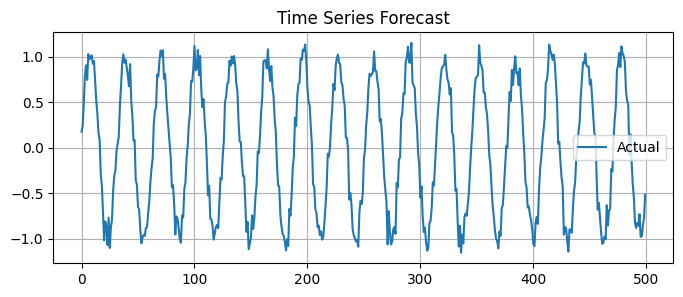

In [ ]:
# Plot
plt.figure(figsize=(8, 3))
plt.plot(data, label='Actual')
plt.title("Time Series Forecast")
plt.legend()
plt.grid(True)
plt.show()

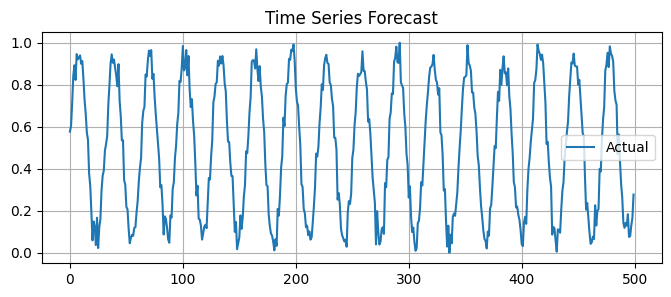

In [ ]:
# Plot
plt.figure(figsize=(8, 3))
plt.plot(data_scaled, label='Actual')
plt.title("Time Series Forecast")
plt.legend()
plt.grid(True)
plt.show()

# Prerocessing

In [ ]:
# Create sequences
def create_sequences(data, seq_len):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        xs.append(data[i:i+seq_len])
        ys.append(data[i+seq_len])
    return np.array(xs), np.array(ys)

seq_len = 5

X, y = create_sequences(data_scaled, seq_len)
X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # [N, seq_len, 1]
y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)

In [ ]:
y[0:2]

tensor([[0.8233],
        [0.9460]])

In [ ]:
# X shape should be (lenght, batch, hidden)

# Data Split

In [ ]:
# Split into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Models

## Artifial Neural Network

In [ ]:
import torch
import torch.nn as nn

class ANNForecastModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size,seq_len, dropout=0.2):
        super(ANNForecastModel, self).__init__()

        self.linear = nn.Linear(input_size, hidden_sizes)
        self.Relu = nn.ReLU()  # Or use nn.Tanh() / nn.LeakyReLU()
        self.droput = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_sizes*seq_len, output_size)


    def forward(self, x):
        out = self.linear(x)
        out = self.Relu(out)
        out = self.droput(out)
        out = torch.flatten(out,start_dim=1)
        # print(out.shape)
        out = self.fc(out)
        return out


## RNN

In [ ]:
import torch
import torch.nn as nn

class RNNForecastModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
        super(RNNForecastModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.rnn = nn.RNN(input_size, hidden_size, num_layers,
                          batch_first=True, dropout=dropout, nonlinearity='tanh')
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x: [batch_size, seq_len, input_size]
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)  # out: [batch_size, seq_len, hidden_size]
        out = self.fc(out[:, -1, :])  # use the output from the last time step
        return out


## GRU

In [ ]:
import torch
import torch.nn as nn

class GRUForecastModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
        super(GRUForecastModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x: [batch_size, sequence_length, input_size]
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)  # out: [batch_size, seq_len, hidden_size]
        out = self.fc(out[:, -1, :])  # Use the last timestep's output
        return out


## LSTM

In [ ]:
import torch
import torch.nn as nn

class LSTMForecastModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
        super(LSTMForecastModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True, dropout=dropout if num_layers > 1 else 0)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x: [batch_size, sequence_length, input_size]
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))  # out: [batch_size, seq_len, hidden_size]
        out = self.fc(out[:, -1, :])     # Only last time step
        return out

class LSTMForecastModel2(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
        super(LSTMForecastModel2, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True, dropout=dropout if num_layers > 1 else 0)
        self.lstm2 = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True, dropout=dropout if num_layers > 1 else 0)

        self.fc = nn.Linear(253440, output_size)


    def forward(self, x):
        # x: [batch_size, sequence_length, input_size]
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))  # out: [batch_size, seq_len, hidden_size]
        out2, _ = self.lstm2(x, (h0, c0))  # out: [batch_size, seq_len, hidden_size]
        print(out.shape)
        out = torch.flatten(torch.cat((out, out2), 1))
        print(out.shape)

        out = self.fc(out)     # Only last time step
        return out

In [ ]:
import torch
import torch.nn as nn

class BiLSTMForecastModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
        super(BiLSTMForecastModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bidirectional = True
        self.num_directions = 2 if self.bidirectional else 1

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True,
                            dropout=dropout if num_layers > 1 else 0,
                            bidirectional=self.bidirectional)

        # Linear layer input size is hidden_size * 2 because of bidirection
        self.fc = nn.Linear(hidden_size * self.num_directions, output_size)

    def forward(self, x):
        # x: [batch_size, seq_len, input_size]
        h0 = torch.zeros(self.num_layers * self.num_directions, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers * self.num_directions, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))  # out: [batch_size, seq_len, hidden_size * 2]
        out = self.fc(out[:, -1, :])     # Use last timestep's output
        return out


## Transofrmer

In [ ]:

import torch
import torch.nn as nn
import math

class SelfAttention(nn.Module):
    def __init__(self, embed_dim, heads):
        super().__init__()
        assert embed_dim % heads == 0, "Embedding dim must be divisible by number of heads"

        self.embed_dim = embed_dim
        self.heads = heads
        self.head_dim = embed_dim // heads

        self.qkv = nn.Linear(embed_dim, embed_dim * 3)  # Combine Q, K, V
        self.fc_out = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        # x: [batch_size, seq_len, embed_dim]
        B, T, E = x.shape

        qkv = self.qkv(x)  # [B, T, 3 * E]
        qkv = qkv.reshape(B, T, 3, self.heads, self.head_dim).permute(2, 0, 3, 1, 4)
        Q, K, V = qkv[0], qkv[1], qkv[2]  # Each: [B, heads, T, head_dim]

        # Compute attention
        energy = (Q @ K.transpose(-2, -1)) / math.sqrt(self.head_dim)  # [B, heads, T, T]
        attn = torch.softmax(energy, dim=-1)

        out = attn @ V  # [B, heads, T, head_dim]
        out = out.transpose(1, 2).reshape(B, T, E)  # Concatenate heads
        return self.fc_out(out)  # Final linear layer


class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, heads, dropout=0.1, forward_expansion=4):
        super().__init__()
        self.attention = SelfAttention(embed_dim, heads)

        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)

        self.feed_forward = nn.Sequential(
            nn.Linear(embed_dim, embed_dim * forward_expansion),
            nn.ReLU(),
            nn.Linear(embed_dim * forward_expansion, embed_dim)
        )

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        attn = self.attention(x)
        x = self.norm1(x + self.dropout(attn))  # Add & Norm
        ff = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff))    # Add & Norm
        return x


class TransformerModel(nn.Module):
    def __init__(self, input_size, embed_dim, num_layers, heads, output_dim, max_len=500, dropout=0.1):
        super().__init__()
        self.embedding = nn.Linear(input_size, embed_dim)
        self.positional_encoding = self._generate_positional_encoding(max_len, embed_dim)

        self.layers = nn.ModuleList([
            TransformerBlock(embed_dim, heads, dropout) for _ in range(num_layers)
        ])

        self.fc_out = nn.Linear(embed_dim, output_dim)

    def _generate_positional_encoding(self, max_len, embed_dim):
        pe = torch.zeros(max_len, embed_dim)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_dim, 2).float() * (-math.log(10000.0) / embed_dim))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # [1, max_len, embed_dim]
        return pe  # Not a parameter

    def forward(self, x):
        # x: [batch_size, seq_len, input_dim]
        B, T, _ = x.shape
        x = self.embedding(x) + self.positional_encoding[:, :T, :].to(x.device)
        for layer in self.layers:
            x = layer(x)
        out = self.fc_out(x[:, -1, :])  # Use last token for prediction
        return out


## *Testing Model

In [ ]:
X_train.shape

torch.Size([396, 5, 1])

In [ ]:
model=ANNForecastModel(input_size=1, hidden_sizes=64, output_size=1, seq_len=seq_len)
model(X_train).shape

torch.Size([396, 320])


torch.Size([396, 1])

#

# Init Model

In [ ]:
# Model, loss, optimizer
# model = ANNForecastModel(input_size=1, hidden_sizes=64, output_size=1,seq_len=seq_len)
# model = RNNForecastModel(input_size=1, hidden_size=64, num_layers=2, output_size=1)
# model = GRUForecastModel(input_size=1, hidden_size=64, num_layers=2, output_size=1)
# model = LSTMForecastModel(input_size=1, hidden_size=64, num_layers=2, output_size=1)
model = LSTMForecastModel2(input_size=1, hidden_size=64, num_layers=2, output_size=1)

# model = BiLSTMForecastModel(input_size=1, hidden_size=64, num_layers=2, output_size=1)
# LSTMForecastModel2


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training

In [ ]:
# Training loop
epochs = 300
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64])
torch.Size([253440])


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([396, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64])
torch.Size([253440])
Epoch [10/300], Loss: 6.1248
torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64])
torch.Size([253440])
Epoch [20/300], Loss: 3.2255
torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64])
torch.Size([253440])
torch.Size([396, 5, 64

# Evaluation

## Artificial Neural Network

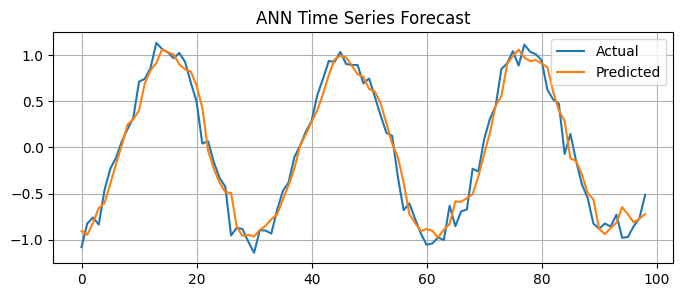

In [ ]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test).squeeze().numpy()
    y_true = y_test.squeeze().numpy()

# Inverse transform
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_true_inv = scaler.inverse_transform(y_true.reshape(-1, 1)).flatten()

# Plot
plt.figure(figsize=(8, 3))
plt.plot(y_true_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("ANN Time Series Forecast")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# y_true dan y_pred dalam bentuk numpy array
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

MSE: 0.0042
RMSE: 0.0647
MAE: 0.0494
R^2 Score: 0.9587


## RNN

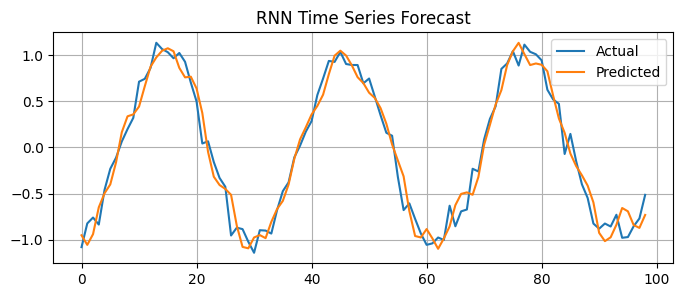

In [ ]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test).squeeze().numpy()
    y_true = y_test.squeeze().numpy()

# Inverse transform
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_true_inv = scaler.inverse_transform(y_true.reshape(-1, 1)).flatten()

# Plot
plt.figure(figsize=(8, 3))
plt.plot(y_true_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("RNN Time Series Forecast")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# y_true dan y_pred dalam bentuk numpy array
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

MSE: 0.0042
RMSE: 0.0651
MAE: 0.0526
R^2 Score: 0.9582


## GRU

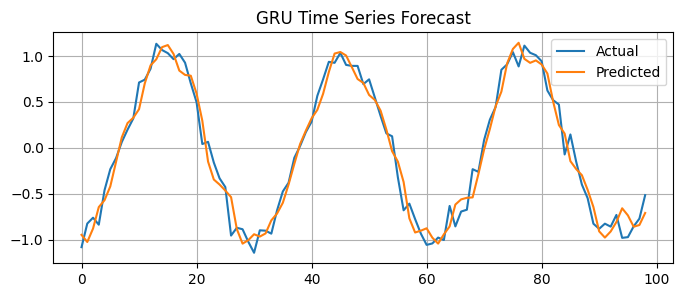

In [ ]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test).squeeze().numpy()
    y_true = y_test.squeeze().numpy()

# Inverse transform
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_true_inv = scaler.inverse_transform(y_true.reshape(-1, 1)).flatten()

# Plot
plt.figure(figsize=(8, 3))
plt.plot(y_true_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("GRU Time Series Forecast")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# y_true dan y_pred dalam bentuk numpy array
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

MSE: 0.0040
RMSE: 0.0633
MAE: 0.0507
R^2 Score: 0.9604


## LSTM

In [ ]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test).squeeze().numpy()
    y_true = y_test.squeeze().numpy()

# Inverse transform
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_true_inv = scaler.inverse_transform(y_true.reshape(-1, 1)).flatten()

# Plot
plt.figure(figsize=(8, 3))
plt.plot(y_true_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("LSTM Time Series Forecast")
plt.legend()
plt.grid(True)
plt.show()

torch.Size([63360])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x63360 and 253440x1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# y_true dan y_pred dalam bentuk numpy array
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")


MSE: 0.0041
RMSE: 0.0642
MAE: 0.0523
R^2 Score: 0.9593


## Bi LSTM

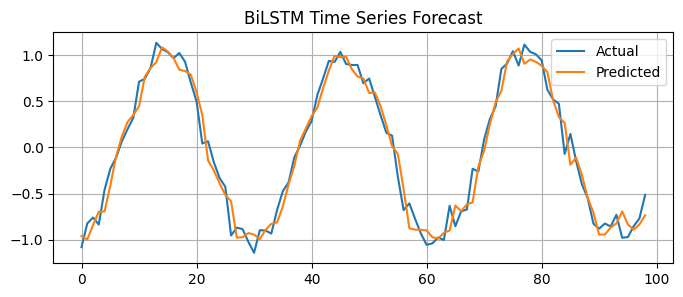

In [ ]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test).squeeze().numpy()
    y_true = y_test.squeeze().numpy()

# Inverse transform
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_true_inv = scaler.inverse_transform(y_true.reshape(-1, 1)).flatten()

# Plot
plt.figure(figsize=(8, 3))
plt.plot(y_true_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("BiLSTM Time Series Forecast")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# y_true dan y_pred dalam bentuk numpy array
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")


MSE: 0.0039
RMSE: 0.0628
MAE: 0.0498
R^2 Score: 0.9611
